# Agregaciones: Mín., Máx. y demás


A menudo, cuando se enfrenta a una gran cantidad de datos, el primer paso es calcular estadísticas de resumen para los datos en cuestión. Quizás las estadísticas de resumen más comunes son la media y la desviación estándar, que le permiten resumir los valores "típicos" en un conjunto de datos, pero también son útiles otros agregados (la suma, el producto, la mediana, el mínimo y el máximo, los cuantiles, etc.).

NumPy tiene funciones de agregación integradas rápidas para trabajar en arreglos; discutiremos y demostraremos algunos de ellos aquí.

## Sumar los valores en un arreglo ¶


Como ejemplo rápido, considere calcular la suma de todos los valores en una matriz. Python mismo puede hacer esto usando la función incorporada 'sum'.

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)
sum(L)

47.37045695377346

La sintaxis es bastante similar a la de NumPy sum función, y el resultado es el mismo en el caso más simple:

In [3]:
np.sum(L)

47.37045695377346

Sin embargo, debido a que ejecuta la operación en código compilado, la versión de la operación de NumPy se calcula mucho más rápido:

In [11]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)
%timeit np.add.reduce(big_array)

146 ms ± 3.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.61 ms ± 27.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.59 ms ± 48.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [14]:
print(f'{np.sum(big_array)} = {np.add.reduce(big_array)}')

500085.06163116667 = 500085.06163116667


Sin embargo, tenga cuidado: la función ``sum``  y la función ``np.sum`` no son idénticas.

En particular, sus argumentos opcionales tienen diferentes significados, y ``np.sum`` es consciente de múltiples dimensiones de matriz, como veremos en la siguiente sección.

## Mínimo y Máximo ¶
De manera similar, Python ha incorporado funciones ``min`` y ``max``, utilizadas para encontrar el valor mínimo y el valor máximo de cualquier matriz dada: 

In [13]:
min(big_array), max(big_array)

(4.987644720566564e-07, 0.9999985125960063)

Las funciones correspondientes de NumPy tienen una sintaxis similar y, de nuevo, funcionan mucho más rápido:

In [12]:
np.min(big_array), np.max(big_array)

(4.987644720566564e-07, 0.9999985125960063)

In [15]:
%timeit min(big_array)
%timeit np.min(big_array)

88.5 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.45 ms ± 55.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Para ``min``, ``max``, ``sum``, y varios otros agregados de NumPy, una sintaxis más corta es usar métodos del propio objeto de array

In [16]:
print(big_array.min(), big_array.max(), big_array.sum())

4.987644720566564e-07 0.9999985125960063 500085.06163116667


Siempre que sea posible, asegúrese de estar utilizando la versión NumPy de estos agregados cuando opere en arreglos NumPy.

### Agregados multidimensionales

Un tipo común de operación de agregación es un agregado a lo largo de una fila o columna.

In [17]:
M = np.random.random((3, 4))
print(M)

[[0.5629136  0.98265867 0.45579129 0.04124412]
 [0.78171306 0.50692199 0.13759736 0.54122958]
 [0.99246943 0.29604191 0.72292268 0.29514903]]


De forma predeterminada, cada función de agregación de NumPy devolverá el agregado sobre toda la matriz:

In [18]:
M.sum()

6.316652735016053

Las funciones de agregación toman un argumento adicional que especifica el eje a lo largo del cual se calcula el agregado. 

Por ejemplo, podemos encontrar el valor mínimo dentro de cada columna especificando ``axis=0``:


In [19]:
M.min(axis=0)

array([0.5629136 , 0.29604191, 0.13759736, 0.04124412])

La función devuelve cuatro valores, correspondientes a las cuatro columnas de números. 

Del mismo modo, podemos encontrar el valor máximo dentro de cada fila: 

In [20]:
M.max(axis=1)

array([0.98265867, 0.78171306, 0.99246943])

La forma en que se especifica el eje aquí puede resultar confusa para los usuarios que provienen de otros idiomas. La palabra clave ``axis`` especifica la dimensión de la matriz que se contraerá, en lugar de la dimensión que se devolverá. 

Entonces especificando ``axis=0`` significa que el primer eje se colapsará: para arreglos bidimensionales, esto significa que los valores dentro de cada columna se agregarán.

### Otras funciones de agregación 

NumPy proporciona muchas otras funciones de agregación, pero no las discutiremos en detalle aquí. Además, la mayoría de los agregados tienen una ``NaN``-equivalente seguro que calcula el resultado ignorando los valores faltantes, que están marcados por el punto flotante especial IEEE ``NaN`` valor. Algunos de estos ``NaN``-Las funciones seguras no se agregaron hasta NumPy 1.8, por lo que no estarán disponibles en versiones anteriores de NumPy. 

La siguiente tabla proporciona una lista de funciones de agregación útiles disponibles en NumPy: 

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Calcular suma de elementos                    |
| ``np.prod``       | ``np.nanprod``      | Calcular el producto de los elementos         |
| ``np.mean``       | ``np.nanmean``      | Calcular media de elementos                   |
| ``np.std``        | ``np.nanstd``       | Calcular desviación estandar                  |
| ``np.var``        | ``np.nanvar``       | Calcular varianza                             |
| ``np.min``        | ``np.nanmin``       | Encuentra valor mínimo                        |
| ``np.max``        | ``np.nanmax``       | Encuentra valor maximo                        |
| ``np.argmin``     | ``np.nanargmin``    | Encuentra índice de valor mínimo              |
| ``np.argmax``     | ``np.nanargmax``    | Encuentra índice de valor máximo              |
| ``np.median``     | ``np.nanmedian``    | Calcular la mediana de los elementos          |
| ``np.percentile`` | ``np.nanpercentile``| Calcular rank-based statistics of elementos   |
| ``np.any``        | N/A                 | Evaluar si algún elemento es verdadero        |
| ``np.all``        | N/A                 | Evaluar si todos los elementos son verdadero  |

Veremos estos agregados a menudo a lo largo del resto del libro. 

## Ejemplo: ¿Cuál es la altura promedio de los presidentes de EE. UU.? ¶


Los agregados disponibles en NumPy pueden ser extremadamente útiles para resumir un conjunto de valores. Como ejemplo simple, consideremos las alturas de todos los presidentes de EE. UU. Estos datos están disponibles en el archivo *president_heights.csv*, que es una lista simple de etiquetas y valores separados por comas:

In [23]:
!head -4 ../data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


Usaremos el paquete Pandas, que exploraremos con más detalle en Capítulo 3 , para leer el archivo y extraer esta información (tenga en cuenta que las alturas se miden en centímetros).

In [24]:
import pandas as pd
data = pd.read_csv('../data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Ahora que tenemos esta matriz de datos, podemos calcular una variedad de estadísticas de resumen:

In [25]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Tenga en cuenta que en cada caso, la operación de agregación redujo la matriz completa a un solo valor de resumen, lo que nos brinda información sobre la distribución de valores. También podemos desear calcular cuantiles:

In [ ]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


Vemos que la altura media de los presidentes de EE. UU. es de 182 cm, o apenas menos de seis pies. 

Por supuesto, a veces es más útil ver una representación visual de estos datos, lo que podemos lograr usando herramientas en Matplotlib (hablaremos de Matplotlib con más detalle en el Capítulo 4 ). Por ejemplo, este código genera el siguiente gráfico: 

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

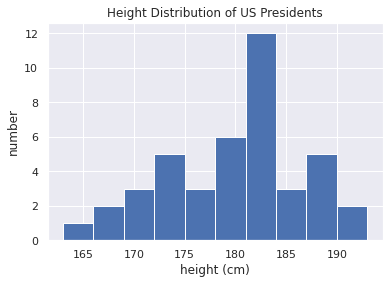

In [28]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

Estos agregados son algunas de las piezas fundamentales del análisis exploratorio de datos que exploraremos con mayor profundidad en capítulos posteriores del libro.